<a href="https://colab.research.google.com/github/ccfernandes600/Calculo-de-Metricas-de-Avaliacao-de-Aprendizado/blob/main/Sistema_de_Recomenda%C3%A7%C3%A3o_por_Imagens_Digitaiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio de Projeto: Sistema de Recomendação por Imagens Digitais

Este projeto visa desenvolver um sistema de recomendação de categorias de produtos com base em imagens digitais. Utilizando técnicas de aprendizado de máquina e processamento de imagens, o sistema é capaz de classificar diferentes categorias de produtos e gerar recomendações com base em imagens de entrada. A linguagem de programação utilizada será Python, aproveitando bibliotecas populares para tarefas de visão computacional e aprendizado de máquina.

# Tecnologias Utilizadas


1.** Linguagem de Programação**
  *  **Python**: Linguagem principal utilizada para desenvolvimento do projeto.

2. **Bibliotecas e Frameworks de Visão Computacional e Aprendizado de Máquina**
  *  **TensorFlow**: Framework de aprendizado de máquina e redes neurais.
  * **Keras**: API de alto nível para construção e treinamento de modelos de aprendizado de máquina, integrada ao TensorFlow.
  * **OpenCV**: Biblioteca de visão computacional utilizada para processamento de imagens.
  * **scikit-learn**: Biblioteca de aprendizado de máquina utilizada para a implementação do K-Nearest Neighbors (KNN).

3. **Manipulação e Visualização de Dados**
  * **NumPy**: Biblioteca para manipulação de arrays e operações matemáticas.
  * **Pandas**: Biblioteca para manipulação e análise de dados estruturados.
  * **Matplotlib**: Biblioteca para visualização de dados.

4.** Ferramentas de Pré-processamento e Aumentação de Dados**
  * **Google Colab**: Ambiente de desenvolvimento colaborativo para a execução de notebooks Jupyter. O Colab permite o upload de arquivos e a execução de código interativo.

5. **Desenvolvimento da Interface de Usuário**
  * Google Colab

6. **Manipulação de Imagens**
  * **Pillow**: Biblioteca para processamento de imagens, utilizada para abrir e manipular arquivos de imagem.

7. Armazenamento de Dados
  * **Google Drive**

# **Etapas do Projeto**

1. **Coleta e Armazenamento de Dados**

  * **Coleta de Imagens**: Obter um conjunto de dados de imagens de produtos de fontes como Kaggle.
  * **Armazenamento no Google Drive**: Organizar e armazenar as imagens no Google Drive para fácil acesso e gerenciamento.

2. **Configuração do Google Colab**
  * **Montar Google Drive**: Conectar o Google Colab ao Google Drive para acessar os dados armazenados.
  * **Upload e Pré-processamento de Imagens**: Carregar imagens do Google Drive, redimensionar, normalizar e, se necessário, aplicar aumentação de dados.

3. **Análise Exploratória de Dados (EDA)**

  * Visualização das imagens e distribuição das categorias.
  * Estatísticas básicas para entender a composição do conjunto de dados.

4. **Construção do Modelo de Classificação de Imagens**

  * **Arquitetura do Modelo**: Seleção de um modelo adequado para classificação de imagens (e.g., CNNs como ResNet, VGG, ou modelos mais leves como MobileNet).
  * **Treinamento do Modelo**: Divisão do conjunto de dados em treinamento e teste, configuração dos hiperparâmetros e treinamento do modelo.
  * **Avaliação do Modelo**: Métricas de desempenho como acurácia, precisão, recall e F1-score.

5. Sistema de Recomendação

  * **Estratégia de Recomendação**: Desenvolver um sistema que recomenda categorias de produtos baseados na similaridade das imagens.
  * **Implementação**: Uso de técnicas como K-Nearest Neighbors (KNN) para encontrar imagens similares no espaço das características aprendidas pelo modelo de classificação.

6. Interface de Usuário

O ideal seria a criação de uma interface simples (pode ser uma aplicação web usando Flask ou Django) onde o usuário pode fazer upload de uma imagem e receber recomendações de categorias. Porém camos usar a biblioteca de upload do Google Colab

7. Validação e Testes

  * Testar a precisão do sistema de recomendação com imagens novas.
  * Coletar feedback e ajustar o modelo conforme necessário.

## Configuração do Google Colab

In [ ]:
# Incializando o Google Driver
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Instalar o Kaggle
!pip install -q -U kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

  Using cached kaggle-1.6.14-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.14
    Uninstalling kaggle-1.6.14:
      Successfully uninstalled kaggle-1.6.14


In [ ]:
# Fazer upload do arquivo kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"ccfernandes600","key":"f584cc3c59af38f58393320d2d50448a"}'}

In [ ]:
# Criar diretório ~/.kaggle e mover kaggle.json para lá
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


### Baixar datasets do Kaggle




In [ ]:
# download das images raw  direto do site kaggle,com
!kaggle datasets download -d paramaggarwal/fashion-product-images-small
!mkdir /content/Fashion_data
!unzip fashion-product-images-small.zip  -d /content/Fashion_data


A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/Fashion_data/images/5813.jpg  
  inflating: /content/Fashion_data/images/58131.jpg  
  inflating: /content/Fashion_data/images/58132.jpg  
  inflating: /content/Fashion_data/images/58133.jpg  
  inflating: /content/Fashion_data/images/58135.jpg  
  inflating: /content/Fashion_data/images/58136.jpg  
  inflating: /content/Fashion_data/images/58137.jpg  
  inflating: /content/Fashion_data/images/58138.jpg  
  inflating: /content/Fashion_data/images/58139.jpg  
  inflating: /content/Fashion_data/images/5814.jpg  
  inflating: /content/Fashion_data/images/58140.jpg  
  inflating: /content/Fashion_data/images/58141.jpg  
  inflating: /content/Fashion_data/images/58143.jpg  
  inflating: /content/Fashion_data/images/58144.jpg  
  inflating: /content/Fashion_data/images/58145.jpg  
  inflating: /content/Fashion_data/images/58146.jpg  
  inflating: /content/Fashion_data/images/58147.jpg  
  inflating: /content/Fas

In [ ]:
# Removendo arquivo zip
import os
if os.path.exists('/content/fashion-product-images-small.zip'):
  !rm -v fashion-product-images-small.zip
  print('Arquivo removido com sucesso.')
else:
  print('Arquivo não encontrado ou já foi removido')

removed 'fashion-product-images-small.zip'
Arquivo removido com sucesso.


In [ ]:
!ls -al

total 32
drwxr-xr-x 1 root root 4096 Jun 25 22:24  .
drwxr-xr-x 1 root root 4096 Jun 25 21:43  ..
drwxr-xr-x 4 root root 4096 Jun 24 13:27  .config
drwx------ 5 root root 4096 Jun 25 21:45  drive
drwxr-xr-x 5 root root 4096 Jun 25 21:52  Fashion_data
-rw-r--r-- 1 root root   70 Jun 25 22:16 'kaggle (1).json'
-rw-r--r-- 1 root root   70 Jun 25 21:46  kaggle.json
drwxr-xr-x 1 root root 4096 Jun 24 13:28  sample_data


In [ ]:
!ls -al Fashion_data/

total 5364
drwxr-xr-x 5 root root    4096 Jun 25 21:52 .
drwxr-xr-x 1 root root    4096 Jun 25 22:24 ..
drwxr-xr-x 9 root root    4096 Jun 25 21:54 categories
drwxr-xr-x 2 root root 1138688 Jun 25 22:18 images
drwxr-xr-x 3 root root    4096 Jun 25 21:47 myntradataset
-rw-r--r-- 1 root root 4332000 Oct 22  2019 styles.csv


In [ ]:
# Capturando as categorias dp dataset importado
import pandas as pd
from shutil import move
import os
from tqdm import tqdm



df = pd.read_csv('/content/Fashion_data/styles.csv', usecols=['id','masterCategory']).reset_index()
df['id'] = df['id'].astype('str')

all_images = os.listdir('/content/Fashion_data/images/')
co = 0
!mkdir /content/Fashion_data/categories
for image in tqdm(all_images):
    category = df[df['id'] == image.split('.')[0]]['masterCategory']
    category = str(list(category)[0])
    if not os.path.exists(os.path.join('/content/Fashion_data/categories', category)):
        os.mkdir(os.path.join('/content/Fashion_data/categories', category))
    path_from = os.path.join('/content/Fashion_data/images', image)
    path_to = os.path.join('/content/Fashion_data/categories', category, image)
    move(path_from, path_to)
    co += 1
print('Moved {} images.'.format(co))

mkdir: cannot create directory ‘/content/Fashion_data/categories’: File exists


100%|██████████| 44441/44441 [04:13<00:00, 175.51it/s]

Moved 44441 images.


In [ ]:
#Imprimir as categorias detectadas

import os

categories = [category for category in os.listdir('/content/Fashion_data/categories')]
print(categories)


['Footwear', 'Sporting Goods', 'Home', 'Free Items', 'Personal Care', 'Apparel', 'Accessories']


###  Ajuste Fino do Codificador [opcional]

Baixe o modelo de imagem pré-treinado e adicione duas camadas adicionais: a primeira camada é uma camada de vetor de recursos e a segunda camada é a camada de classificação. Treinaremos apenas essas 2 camadas em nossos dados e, após o treinamento, selecionaremos a camada vetorial de recursos como a saída de nosso codificador ajustado. Após o ajuste fino do modelo, salvaremos o extrator de recursos para uso posterior.

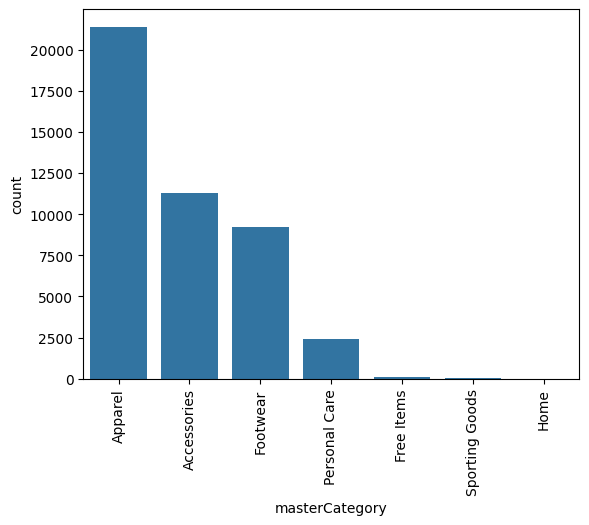

,index
count,44446.000000
mean,22222.500000
std,12830.599369
min,0.000000
25%,11111.250000
50%,22222.500000
75%,33333.750000
max,44445.000000


In [ ]:
# Análise Exploratória de Dados (EDA)
# Visualização das imagens e distribuição das categorias.
# Estatísticas básicas para entender a composição do conjunto de dados.
import pandas as pd
from shutil import move
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of categories
sns.countplot(x='masterCategory', data=df)
plt.xticks(rotation=90)
plt.show()

# Calculate basic statistics
df.describe()


In [ ]:
# importando e verificando as vesões das bibliotecas  e verificando outras informações relevantes
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.15.0
Hub version: 0.16.1
GPU is NOT AVAILABLE


In [ ]:
#configurando alguns parâmetros e exibindo informações relacionadas a um módulo de TensorFlow Hub
MODULE_HANDLE = 'https://tfhub.dev/google/bit/m-r50x3/1'
IMAGE_SIZE = (224, 224)
print("Using {} with input size {}".format(MODULE_HANDLE, IMAGE_SIZE))
BATCH_SIZE = 32
N_FEATURES = 256

Using https://tfhub.dev/google/bit/m-r50x3/1 with input size (224, 224)


In [ ]:
# Definindo diretório das Categorias
data_dir = '/content/Fashion_data/categories'

In [ ]:
# configura Configuração dos geradores de dados para treinamento e validação de
# um modelo de aprendizado de máquina usando a biblioteca tf.keras.preprocessing.
# image.ImageDataGenerator do TensorFlow

datagen_kwargs = dict(rescale=1./255, validation_split=.20)
dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                   interpolation="bilinear")

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    data_dir, subset="validation", shuffle=False, **dataflow_kwargs)

do_data_augmentation = False
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, zoom_range=0.2,
      **datagen_kwargs)
else:
  train_datagen = valid_datagen
train_generator = train_datagen.flow_from_directory(
    data_dir, subset="training", shuffle=True, **dataflow_kwargs)

Found 8886 images belonging to 7 classes.
Found 35555 images belonging to 7 classes.


In [ ]:
# Construindo  constrói um modelo de aprendizado de máquina usando
# o TensorFlow e o TensorFlow Hub
print("Contruido o modelo com ", MODULE_HANDLE)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(MODULE_HANDLE, trainable=False),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(N_FEATURES,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Contruido o modelo com  https://tfhub.dev/google/bit/m-r50x3/1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 6144)              211174080 
                                                                 
 dropout (Dropout)           (None, 6144)              0         
                                                                 
 dense (Dense)               (None, 256)               1573120   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 212748999 (811.57 MB)
Trainable params: 1574919 (6.01 MB)
Non-trainable params: 211174080 (805.57 MB)
_________

In [ ]:
#define e configura o otimizador, a função de perda e a taxa de aprendizado para
#o treinamento do modelo de aprendizado de máquina.

lr = 0.003 * BATCH_SIZE / 512
SCHEDULE_LENGTH = 500
SCHEDULE_BOUNDARIES = [200, 300, 400]

# Reduzir a taxa de aprendizado por um fator de 10 nos pontos definidos por SCHEDULE_BOUNDARIES.

lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=SCHEDULE_BOUNDARIES,
                                                                   values=[lr, lr*0.1, lr*0.001, lr*0.0001])
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
#treinamento do modelo de aprendizado de máquina usando os geradores de dados
# train_generator e valid_generator no TensorFlow.

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size
hist = model.fit(
    train_generator,
    epochs=1, steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps).history

  51/1111 [>.............................] - ETA: 18:07:32 - loss: 1.4202 - accuracy: 0.8339

KeyboardInterrupt: 

In [ ]:
# plotagem de como a perda e a precisão do modelo evoluem durante
# o treinamento e a validação.

plt.figure()
plt.ylabel("Perda (treinamento e validação)")
plt.xlabel("Passos de Treinamento")
plt.ylim([0,2])
plt.plot(hist["Perdas"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Precisão (treinamento e validação)")
plt.xlabel("Passos de Treinamento")
plt.ylim([0,1])
plt.plot(hist["acurácia"])
plt.plot(hist["val_accuracy"])

In [ ]:
# cria um diretório se ele não existir e salva modelos treinados em TensorFlow
# em formatos específicos.
if not os.path.exists('/content/drive/MyDrive/ImgSim/'):
  !mkdir/content/drive/MyDrive/ImgSim/

feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-3].output)
feature_extractor.save('/content/drive/MyDrive/ImgSim/bit_feature_extractor', save_format='tf')

saved_model_path = '/content/drive/MyDrive/ImgSim/bit_model'
tf.saved_model.save(model, saved_model_path)

### Vetorização das imagens
Agora, vamos usar o codificador para codificar as imagens. Vamos salvar o vetor de características de cada imagem como uma matriz em um diretório. Após o processamento, salvaremos essas incorporações para uso posterior.

In [ ]:
# importa bibliotecas e Configura tqdm para que ele possa ser usado com métodos
# progress_apply e progress_map do pandas. Isso permite que o tqdm exiba uma
# barra de progresso ao aplicar funções a objetos do pandas, como séries
#  ou dataframes.

import tensorflow as tf
from pathlib import Path
import numpy as np
import os
from tqdm import tqdm
tqdm.pandas()

In [ ]:
# percorre recursivamente um diretório específico (/content/Fashion_data/categories)
# em busca de arquivos com a extensão .jpg e armazena os caminhos desses
# arquivos em uma lista (img_paths). Depis  embaralha aleatoriamente essa lista
# usando NumPy, garantindo que a ordem das imagens não influencie o
# processamento subsequente.
img_paths = []
for path in Path('/content/Fashion_data/categories').rglob('*.jpg'):
  img_paths.append(path)
np.random.shuffle(img_paths)

In [ ]:
# Esta função load_img encapsula o processo de leitura, decodificação,
# redimensionamento, conversão de tipo e ajuste de dimensões de uma imagem.

def load_img(path):
  """carrega e proceesa as imagens a partir do modelo utilizado."""
  img = tf.io.read_file(path)
  img = tf.io.decode_jpeg(img, channels=3)
  img = tf.image.resize_with_pad(img, 224, 224)
  img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  return img

In [ ]:
#Este trecho de código implementa uma lógica para carregar um modelo de
# aprendizado de máquina para extração de características.

TRANSFER_LEARNING_FLAG = 1
if TRANSFER_LEARNING_FLAG:
  module = tf.keras.models.load_model('/content/drive/MyDrive/ImgSim/bit_feature_extractor')
else:
  module_handle = "https://tfhub.dev/google/bit/s-r50x3/ilsvrc2012_classification/1"
  module = hub.load(module_handle)

In [ ]:
# cria um diretório para armazenar vetores de imagens em um caminho especificado
# (/content/img_vectors/).

imgvec_path = '/content/img_vectors/'
Path(imgvec_path).mkdir(parents=True, exist_ok=True)

In [ ]:
# ercorre uma lista de caminhos de imagens (img_paths), processa as primeiras
# 5000 imagens, extrai suas características usando um modelo pré-treinado, e
# salva os vetores de características em arquivos .npz no diretório especificado

for filename in tqdm(img_paths[:5000]):
    img = load_img(str(filename))
    features = module(img)
    feature_set = np.squeeze(features)
    outfile_name = os.path.basename(filename).split('.')[0] + ".npz"
    out_path_file = os.path.join(imgvec_path, o
                                 ,utfile_name)
    np.savetxt(out_path_file, feature_set, delimiter=',')

### Metadata e Indexação




Vamos atribuir um ID único a cada imagem e criar dicionários para localizar informações dessa imagem: 1) dicionário de ID da imagem para nome da imagem, 2) dicionário de ID da imagem para vetor de características da imagem e 3) (opcional) dicionário de ID da imagem para ID de produto nos metadados. Também iremos criar um índice de ID da imagem para vetor de características da imagem. Em seguida, salvaremos esses dicionários e o objeto de índice para uso posterior.

In [ ]:
# Importação das bibliotecas necessárias aos fragmentos de código a seguir
import pandas as pd
import glob
import os
import numpy as np
from tqdm import tqdm
tqdm.pandas()
!pip install -q annoy
import json
from annoy import AnnoyIndex
from scipy import spatial
import pickle
from IPython.display import Image as dispImage

In [ ]:
# Carregando uma imagem de teste
test_img = '/content/Fashion_data/categories/Accessories/1941.jpg'
dispImage(test_img)

In [ ]:
# O código lê um arquivo CSV chamado styles.csv, converte a coluna id para o
# tipo string, e depois salva o DataFrame modificado de volta para um arquivo
# CSV, ignorando linhas com erros durante a leitura e sem incluir o índice
# no arquivo salvo.
styles = pd.read_csv('/content/styles.csv', error_bad_lines=False)
styles['id'] = styles['id'].astype('str')
styles.to_csv(root_path+'/styles.csv', index=False)

In [ ]:
#A função match_id procura o valor fname na coluna id do DataFrame styles e
# retorna o índice da primeira ocorrência. Se fname não for encontrado,
# o código pode gerar um erro.
def match_id(fname):
  return styles.index[styles.id==fname].values[0]

In [ ]:
# Define a estrutra de dados como um dic vazio
file_index_to_file_name = {}
file_index_to_file_vector = {}
file_index_to_product_id = {}

# Configuring annoy parameters
dims = 256
n_nearest_neighbors = 20
trees = 10000

# Reads all file names which stores feature vectors
allfiles = glob.glob('/content/img_vectors/*.npz')

t = AnnoyIndex(dims, metric='angular')

In [ ]:
# Este código itera sobre uma lista de arquivos, carregando vetores de
# características e associando cada vetor a um índice, nome do arquivo e,
# opcionalmente, a um ID de produto.

for findex, fname in tqdm(enumerate(allfiles)):
  file_vector = np.loadtxt(fname)
  file_name = os.path.basename(fname).split('.')[0]
  file_index_to_file_name[findex] = file_name
  file_index_to_file_vector[findex] = file_vector
  try:
    file_index_to_product_id[findex] = match_id(file_name)
  except IndexError:
    pass
  t.add_item(findex, file_vector)

In [ ]:
#hide-output
t.build(trees)
t.save('t.ann')

In [ ]:
#hide
file_path = '/content/drive/MyDrive/ImgSim/'

In [ ]:
t.save(file_path+'indexer.ann')
pickle.dump(file_index_to_file_name, open(file_path+"file_index_to_file_name.p", "wb"))
pickle.dump(file_index_to_file_vector, open(file_path+"file_index_to_file_vector.p", "wb"))
pickle.dump(file_index_to_product_id, open(file_path+"file_index_to_product_id.p", "wb"))

## Teste com imagem Local

Vamos carregar um aimagem e vericar se a mesma será classificada de forma adequada.

In [1]:
#hide
from PIL import Image
import matplotlib.image as mpimg

In [ ]:
img_addr = 'https://images-na.ssl-images-amazon.com/images/I/81%2Bd6eSA0eL._UL1500_.jpg'

!wget -q -O img.jpg $img_addr
test_img = 'img.jpg'
topK = 4

test_vec = np.squeeze(module(load_img(test_img)))

basewidth = 224
img = Image.open(test_img)
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img

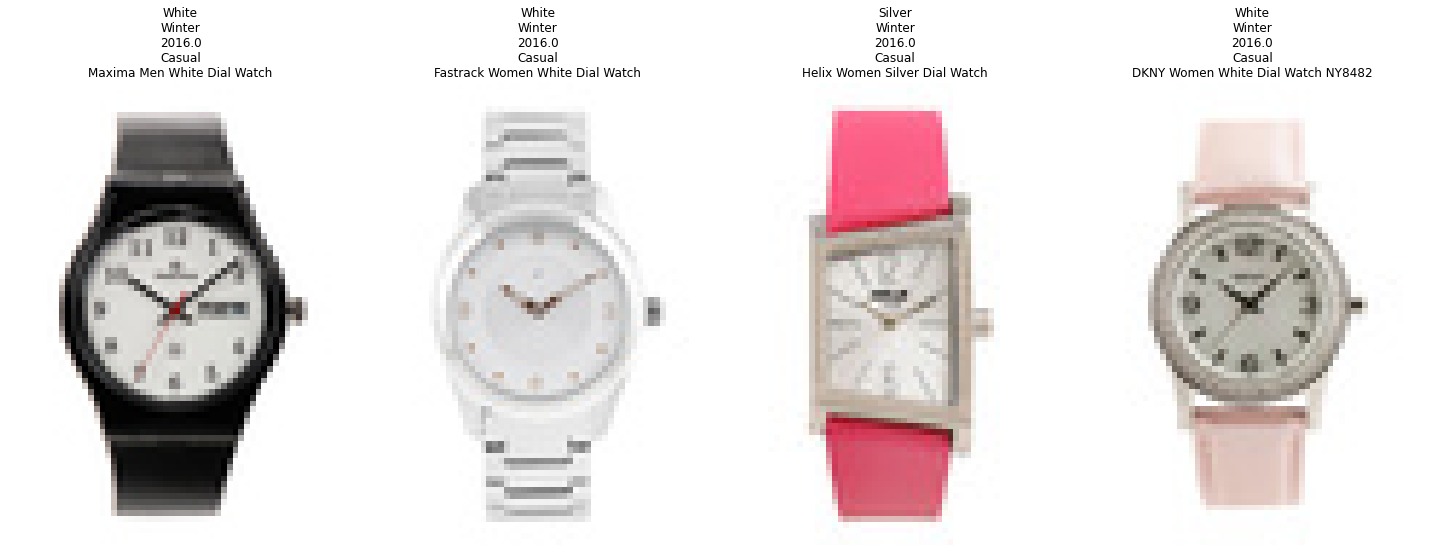

In [ ]:
path_dict = {}
for path in Path('/content/Fashion_data/categories').rglob('*.jpg'):
  path_dict[path.name] = path

nns = t.get_nns_by_vector(test_vec, n=topK)
plt.figure(figsize=(20, 10))
for i in range(topK):
  x = file_index_to_file_name[nns[i]]
  x = path_dict[x+'.jpg']
  y = file_index_to_product_id[nns[i]]
  title = '\n'.join([str(j) for j in list(styles.loc[y].values[-5:])])
  plt.subplot(1, topK, i+1)
  plt.title(title)
  plt.imshow(mpimg.imread(x))
  plt.axis('off')
plt.tight_layout()